In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
dataset = pd.read_csv('dataset.csv')

In [4]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head())

(1459, 2)
              area          price
count  1459.000000    1459.000000
mean   2190.000000  179753.191714
std     421.321334   82821.957209
min    1461.000000   28912.730000
25%    1825.500000  127442.500000
50%    2190.000000  156575.000000
75%    2554.500000  210279.500000
max    2919.000000  888267.600000
   area     price
0  1461  121595.0
1  1462  161616.0
2  1463  185267.0
3  1464  199795.0
4  1465  190145.0


In [5]:
Income = dataset['price'].values
Spend = dataset['area'].values
X = np.array(list(zip(Income, Spend)))
X

array([[121595.,   1461.],
       [161616.,   1462.],
       [185267.,   1463.],
       ...,
       [168021.,   2917.],
       [116990.,   2918.],
       [219616.,   2919.]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

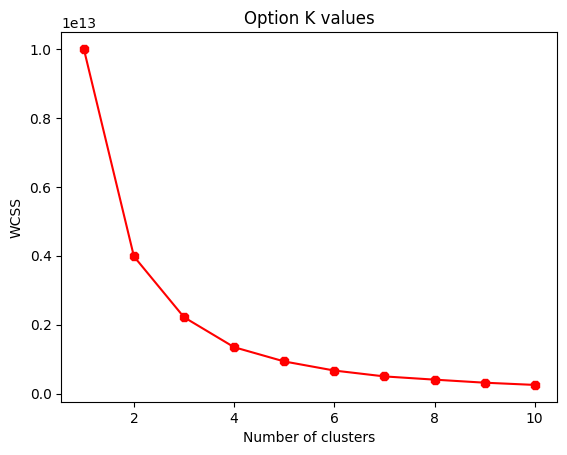

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color="red", marker="8")
plt.title('Option K values')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
model= KMeans(n_clusters=4, random_state=0)
y_means = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


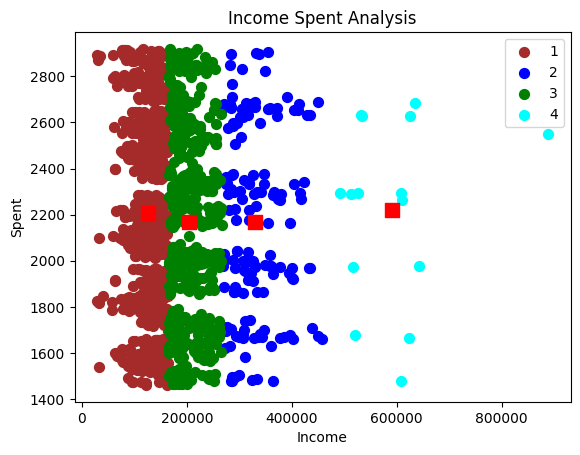

In [8]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c= 'brown', label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c= 'blue', label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c= 'green', label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c= 'cyan', label='4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, marker='s', c='red',linewidths=None )
plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()